# Students Marks Prediction

# Goal of the project

The system aims to predict student's marks using linear regression. The idea behind this analysis is to predict the marks of students by their studying hours.

Through this project we can determine:

How many hours need to do the study to get 99% marks or to pass the exam. 
If I will do study 5 hours per day so how much marks I will get. 
Through these points the school or College can determine the performance of the students.

In [1]:
import numpy as np    # NumPy is a Python library used for working with arrays.
import pandas as pd  # It has functions for analyzing, cleaning, exploring, and manipulating data.
import matplotlib.pyplot as plt    # for plot the graph"""

Load Dataset

In [2]:
dataset=pd.read_csv("student_info.csv")

In [3]:
dataset.head()   # display first 5 rows

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


# Disciption About Dataset

there are two columns  and 200 rows in dataset

1)  study_hours     -  Per day study hours of students

2)  Students_marks  -  Manual Marks in the form of %

In [4]:
dataset.info() # display the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
dataset.shape   # 200 cols and 2 rows

(200, 2)

In [6]:
dataset.describe() # I am going to see desciption about dataset

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


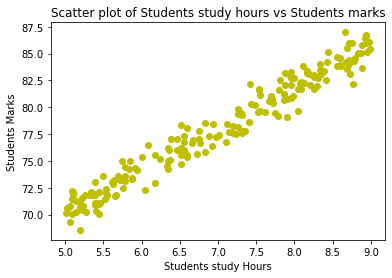

In [7]:
plt.scatter(x =dataset.study_hours,y =dataset.student_marks , color="y")   
plt.xlabel("Students study Hours")
plt.ylabel("Students Marks")
plt.title("Scatter plot of Students study hours vs Students marks")
plt.show()

# Data cleaning

<AxesSubplot:>

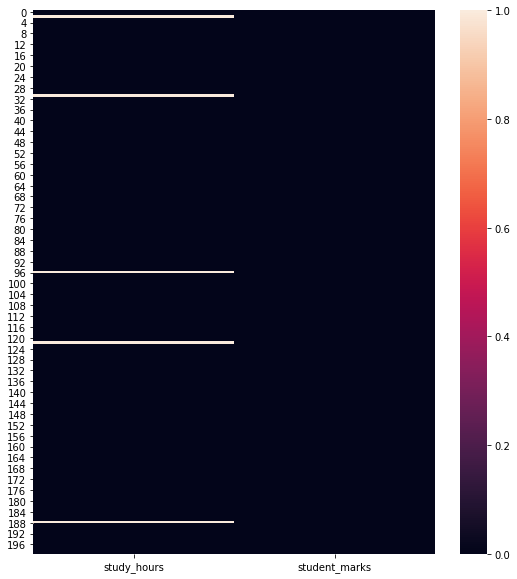

In [8]:
import seaborn as sns          # show the number of missing data
plt.figure(figsize=(9,10))     
sns.heatmap(dataset.isnull())

In [9]:
dataset.isnull().sum()    # how many missing value present

study_hours      5
student_marks    0
dtype: int64

In [10]:
dataset.mean()     # find mean value

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [11]:
filled_value=dataset.fillna(dataset.mean())   # filled in missing datapoints 

In [12]:
filled_value.isnull().sum()    # now there is no missing value

study_hours      0
student_marks    0
dtype: int64

In [13]:
filled_value.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


# Split the Dataset

In [14]:
x=filled_value.drop("student_marks" , axis="columns")
y=filled_value.drop("study_hours" , axis="columns")

In [15]:
print("shape of students_hours (x) =",x.shape)   #study_hours (independent variable)

shape of students_hours (x) = (200, 1)


In [16]:
print("shape of students_marks (y) =",y.shape)   # student_marks (dependent variable)

shape of students_marks (y) = (200, 1)


# Train_test_split 

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=51)

In [18]:
print("shape of x_train =", x_train.shape)
print("shape of y_train =", y_train.shape)

shape of x_train = (160, 1)
shape of y_train = (160, 1)


In [34]:
print("shape of x_test =", x_test.shape)
print("shape of y_test =", y_test.shape)

shape of x_test = (40, 1)
shape of y_test = (40, 1)


# Select a Model and Train it

Linear Regression is a machine learning algorithm based on supervised learning. ... Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [20]:
#linear_regration formula y = m * x + c  

In [35]:
from sklearn.linear_model import LinearRegression   # algorithgm
lr=LinearRegression()

In [36]:
lr.fit(x_train , y_train)

LinearRegression()

In [37]:
lr.coef_      #  value of m

array([[3.93571802]])

In [38]:
lr.intercept_    # value of c

array([50.44735504])

In [39]:
lr.predict([[4]])[0][0].round(2)  # final prediction in the form of % that is 66.19% using 4 hours

66.19

# Testing the Model

In [40]:
testing_value =lr.predict(x_test)
testing_value

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [41]:
pd.DataFrame(np.c_[x_test, y_test, testing_value],
             columns=["students_hours", "Orignal_students_marks", "Predicted_students_marks"])

,students_hours,Orignal_students_marks,Predicted_students_marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


Find Acuracy 

In [42]:
lr.score(x_test,y_test)    # We have got 95% accuracy

0.9514124242154466

<function matplotlib.pyplot.show(close=None, block=None)>

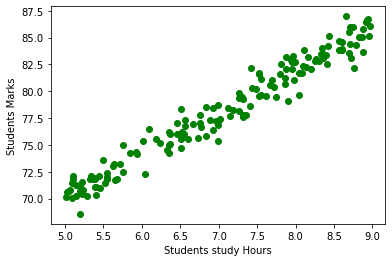

In [43]:
plt.scatter(x_train,y_train,color="g") # tranning dataset
plt.xlabel("Students study Hours")
plt.ylabel("Students Marks")
plt.show

Text(0, 0.5, 'Students Marks')

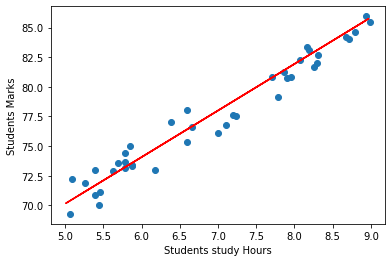

In [44]:
plt.scatter(x_test,y_test)     # testing dataset    
plt.plot(x_train,lr.predict(x_train), color="r")   # line missing points show our 5% accuracy
plt.xlabel("Students study Hours")
plt.ylabel("Students Marks")

# Save The Model

In [45]:
import joblib
joblib.dump(lr, "Students_Marks_Predictor_Model.pkl")

['Students_Marks_Predictor_Model.pkl']

In [46]:
model = joblib.load("Students_Marks_Predictor_Model.pkl")

In [47]:
model.predict([[6]])[0][0].round(2)

74.06